## Stock Price Prediction


In [59]:
# Import Dependencies

import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn import metrics

## Load Dataset


In [60]:
df = yf.download('AAPL', start='2012-01-01',end='2022-01-01')

[*********************100%%**********************]  1 of 1 completed


In [61]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.466092,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.533085,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.672229,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.804701,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.784392,394024400


In [62]:
l=list(df.index)

In [63]:
df.shape

(2517, 6)

In [64]:
df.dropna()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.466092,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.533085,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.672229,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.804701,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.784392,394024400
...,...,...,...,...,...,...
2021-12-27,177.089996,180.419998,177.070007,180.330002,178.527771,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,177.498138,79144300
2021-12-29,179.330002,180.630005,178.139999,179.380005,177.587250,62348900


## Checking Null Values 

In [65]:
nan_counts = df.isna().sum()
print(nan_counts)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [66]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

## EDA 

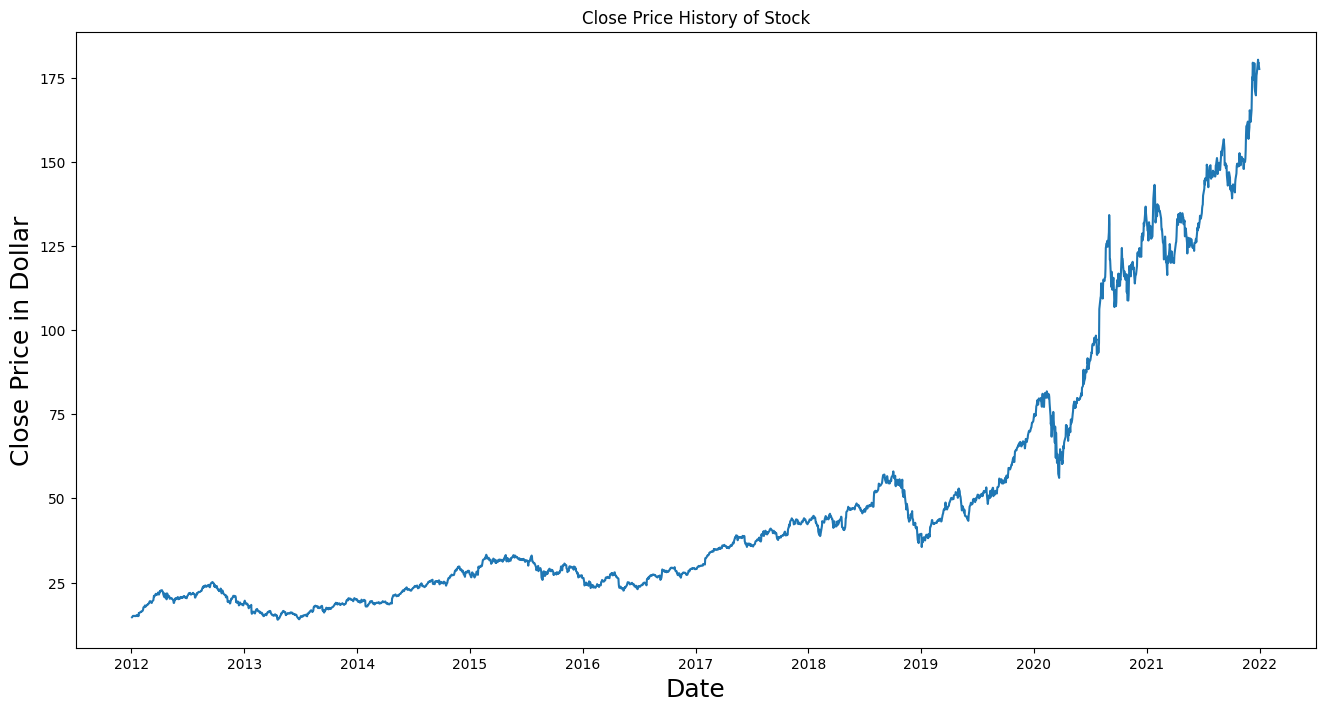

In [67]:
plt.figure(figsize=(16,8))
plt.title('Close Price History of Stock')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price in Dollar',fontsize=18)
plt.show()

In [68]:
for i in range(1,30):
    forecast_out=i
    df['Adj Close'+str(i)]=df[['Adj Close']].shift(-forecast_out)
df.head()    

,Open,High,Low,Close,Adj Close,Volume,Adj Close1,Adj Close2,Adj Close3,Adj Close4,...,Adj Close20,Adj Close21,Adj Close22,Adj Close23,Adj Close24,Adj Close25,Adj Close26,Adj Close27,Adj Close28,Adj Close29
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.466092,302220800,12.533085,12.672229,12.804701,12.784392,...,13.829019,13.796582,13.934814,14.064859,14.212189,14.450156,14.950036,14.957614,15.235895,15.443857
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.533085,260022000,12.672229,12.804701,12.784392,12.830166,...,13.796582,13.934814,14.064859,14.212189,14.450156,14.950036,14.957614,15.235895,15.443857,15.086455
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.672229,271269600,12.804701,12.784392,12.830166,12.809250,...,13.934814,14.064859,14.212189,14.450156,14.950036,14.957614,15.235895,15.443857,15.086455,15.224074
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.804701,318292800,12.784392,12.830166,12.809250,12.774083,...,14.064859,14.212189,14.450156,14.950036,14.957614,15.235895,15.443857,15.086455,15.224074,15.221344
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.784392,394024400,12.830166,12.809250,12.774083,12.726189,...,14.212189,14.450156,14.950036,14.957614,15.235895,15.443857,15.086455,15.224074,15.221344,15.607245


In [69]:
forecast_out=30
df['Prediction']=df[['Adj Close']].shift(-forecast_out)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Adj Close1,Adj Close2,Adj Close3,Adj Close4,...,Adj Close21,Adj Close22,Adj Close23,Adj Close24,Adj Close25,Adj Close26,Adj Close27,Adj Close28,Adj Close29,Prediction
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.466092,302220800,12.533085,12.672229,12.804701,12.784392,...,13.796582,13.934814,14.064859,14.212189,14.450156,14.950036,14.957614,15.235895,15.443857,15.086455
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.533085,260022000,12.672229,12.804701,12.784392,12.830166,...,13.934814,14.064859,14.212189,14.450156,14.950036,14.957614,15.235895,15.443857,15.086455,15.224074
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.672229,271269600,12.804701,12.784392,12.830166,12.809250,...,14.064859,14.212189,14.450156,14.950036,14.957614,15.235895,15.443857,15.086455,15.224074,15.221344
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.804701,318292800,12.784392,12.830166,12.809250,12.774083,...,14.212189,14.450156,14.950036,14.957614,15.235895,15.443857,15.086455,15.224074,15.221344,15.607245
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.784392,394024400,12.830166,12.809250,12.774083,12.726189,...,14.450156,14.950036,14.957614,15.235895,15.443857,15.086455,15.224074,15.221344,15.607245,15.552381


## Pre-Processing 

In [70]:
dfs=preprocessing.scale(df)

C:\Users\rehan\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


In [71]:
nan_counts = df.isna().sum()
print(nan_counts)

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Adj Close1      1
Adj Close2      2
Adj Close3      3
Adj Close4      4
Adj Close5      5
Adj Close6      6
Adj Close7      7
Adj Close8      8
Adj Close9      9
Adj Close10    10
Adj Close11    11
Adj Close12    12
Adj Close13    13
Adj Close14    14
Adj Close15    15
Adj Close16    16
Adj Close17    17
Adj Close18    18
Adj Close19    19
Adj Close20    20
Adj Close21    21
Adj Close22    22
Adj Close23    23
Adj Close24    24
Adj Close25    25
Adj Close26    26
Adj Close27    27
Adj Close28    28
Adj Close29    29
Prediction     30
dtype: int64


In [72]:
df.fillna(df.mean())

,Open,High,Low,Close,Adj Close,Volume,Adj Close1,Adj Close2,Adj Close3,Adj Close4,...,Adj Close21,Adj Close22,Adj Close23,Adj Close24,Adj Close25,Adj Close26,Adj Close27,Adj Close28,Adj Close29,Prediction
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.466092,302220800,12.533085,12.672229,12.804701,12.784392,...,13.796582,13.934814,14.064859,14.212189,14.450156,14.950036,14.957614,15.235895,15.443857,15.086455
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.533085,260022000,12.672229,12.804701,12.784392,12.830166,...,13.934814,14.064859,14.212189,14.450156,14.950036,14.957614,15.235895,15.443857,15.086455,15.224074
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.672229,271269600,12.804701,12.784392,12.830166,12.809250,...,14.064859,14.212189,14.450156,14.950036,14.957614,15.235895,15.443857,15.086455,15.224074,15.221344
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.804701,318292800,12.784392,12.830166,12.809250,12.774083,...,14.212189,14.450156,14.950036,14.957614,15.235895,15.443857,15.086455,15.224074,15.221344,15.607245
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.784392,394024400,12.830166,12.809250,12.774083,12.726189,...,14.450156,14.950036,14.957614,15.235895,15.443857,15.086455,15.224074,15.221344,15.607245,15.552381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,177.089996,180.419998,177.070007,180.330002,178.527771,74919600,177.498138,177.587250,176.419037,175.795349,...,47.096431,47.109778,47.123079,47.136340,47.149552,47.162679,47.175616,47.188560,47.201403,47.214172
2021-12-28,180.160004,181.330002,178.529999,179.289993,177.498138,79144300,177.587250,176.419037,175.795349,46.866647,...,47.096431,47.109778,47.123079,47.136340,47.149552,47.162679,47.175616,47.188560,47.201403,47.214172
2021-12-29,179.330002,180.630005,178.139999,179.380005,177.587250,62348900,176.419037,175.795349,46.853098,46.866647,...,47.096431,47.109778,47.123079,47.136340,47.149552,47.162679,47.175616,47.188560,47.201403,47.214172


In [73]:
df_filled = df.fillna(df.mean())
print(df_filled)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   14.621429   14.732143   14.607143   14.686786   12.466092   
2012-01-04   14.642857   14.810000   14.617143   14.765714   12.533085   
2012-01-05   14.819643   14.948214   14.738214   14.929643   12.672229   
2012-01-06   14.991786   15.098214   14.972143   15.085714   12.804701   
2012-01-09   15.196429   15.276786   15.048214   15.061786   12.784392   
...                ...         ...         ...         ...         ...   
2021-12-27  177.089996  180.419998  177.070007  180.330002  178.527771   
2021-12-28  180.160004  181.330002  178.529999  179.289993  177.498138   
2021-12-29  179.330002  180.630005  178.139999  179.380005  177.587250   
2021-12-30  179.470001  180.570007  178.089996  178.199997  176.419037   
2021-12-31  178.089996  179.229996  177.259995  177.570007  175.795349   

               Volume  Adj Close1  Ad

## Train Test Split 

In [74]:
def create_train_test_set(df):
    
    features = df.drop(columns=['Prediction'], axis=1)
    target = df['Prediction']
    

    data_len = df.shape[0]
    print('Stock Data length is - ', str(data_len))

    #create a chronological split for train and testing
    train_split = int(data_len * 0.7)
    print('Training Set length - ', str(train_split))

    val_split = train_split + int(data_len * 0.1)
    print('Validation Set length - ', str(int(data_len * 0.1)))

    print('Test Set length - ', str(int(data_len * 0.2)))

    # Splitting features and target into train, validation and test samples 
    x_train, x_val, x_test = features[:train_split], features[train_split:val_split], features[val_split:]
    y_train, y_val, y_test = target[:train_split], target[train_split:val_split], target[val_split:]

    #print shape of samples
    print(x_train.shape, x_val.shape, x_test.shape)
    print(y_train.shape, y_val.shape, y_test.shape)
    
    return x_train, x_val, x_test, y_train, y_val, y_test

In [75]:
x_train, x_val, x_test, y_train, y_val, y_test = create_train_test_set(df_filled)


Stock Data length is -  2517
Training Set length -  1761
Validation Set length -  251
Test Set length -  503
(1761, 35) (251, 35) (505, 35)
(1761,) (251,) (505,)


## Linear Regression 

In [76]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [77]:
print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)

LR Coefficients: 
 [ 1.50155693e-01 -1.22433217e-01 -7.30837250e-02 -1.13365418e-02
  1.03491439e-01 -8.28164283e-11 -1.24120335e-01  1.46739165e-01
 -1.15522131e-01  4.72646410e-02  6.01633374e-02 -9.32053869e-02
  3.65454934e-02 -3.16231254e-02 -1.35515497e-02  1.55481585e-02
  4.77034335e-03 -6.60822391e-02  1.02889227e-01  8.91288053e-03
 -2.55601825e-02  6.46807114e-03 -2.41026541e-02  3.97957555e-02
 -6.09689246e-02  4.26405935e-02  6.63821572e-02 -1.60183410e-01
  7.04296769e-02  1.95612081e-02 -2.23726531e-02  5.17593478e-02
  2.32878787e-02 -7.72079042e-02  1.02254606e+00]
LR Intercept: 
 0.23738214351796572


In [78]:
print("Performance (R^2): ", lr.score(x_train, y_train))

Performance (R^2):  0.9981126309698934


In [79]:
def get_mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [80]:
y_train_pred = lr.predict(x_train)
y_val_pred = lr.predict(x_val)
y_test_pred = lr.predict(x_test)

In [81]:
print("Training R-squared: ",round(metrics.r2_score(y_train,y_train_pred),2))
print("Training Explained Variation: ",round(metrics.explained_variance_score(y_train,y_train_pred),2))
print('Training MAPE:', round(get_mape(y_train,y_train_pred), 2)) 
print('Training Mean Squared Error:', round(metrics.mean_squared_error(y_train,y_train_pred), 2)) 
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(y_train,y_train_pred),2))

print(' ')

Training R-squared:  1.0
Training Explained Variation:  1.0
Training MAPE: 1.15
Training Mean Squared Error: 0.2
Training RMSE:  0.45
Training MAE:  0.3
 


In [82]:
print("Test R-squared: ",round(metrics.r2_score(y_test,y_test_pred),2))
print("Test Explained Variation: ",round(metrics.explained_variance_score(y_test,y_test_pred),2))
print('Test MAPE:', round(get_mape(y_test,y_test_pred), 2)) 
print('Test Mean Squared Error:', round(metrics.mean_squared_error(y_test,y_test_pred), 2)) 
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(y_test,y_test_pred),2))

Test R-squared:  0.96
Test Explained Variation:  0.96
Test MAPE: 2.73
Test Mean Squared Error: 40.59
Test RMSE:  6.37
Test MAE:  2.32
